# Setup

In [1]:
import bizwiz

path_manager = bizwiz.PathManager(
    data_dir = "../data/comtrade/"
)

# Find Countries

In [2]:
from bizwiz.trade import search_codes
countries = [
    'sweden',
    'canada',
    'united states',
    'china',
    'india',
    'germany',
    'france',
]

df = search_codes.get_country_codes(keywords=countries, filepath='../data/comtrade/iso_country_codes.csv')
df

,name,iso,comtrade_query,keyword
0,Sweden,SWE,752,sweden
1,Canada,CAN,124,canada
2,United States of America,USA,"840,842,841",united states
3,China,CHN,156,china
4,India,IND,"699,356",india
5,Germany,DEU,"280,276",germany
6,France,FRA,"251,250",france


# Find HS Code

In [3]:
from bizwiz.trade import search_codes
chemicals = [
    'caustic',
    'h2so4',
    'na2so4',
    'potassium sulphate',
    'potassium chloride'
]

df = search_codes.get_hs_codes(keywords=chemicals)
display(df)
display(df['id'].tolist())

,id,score,text,rank,reasoning,chemical_name,keyword
0,281511,90,281511 - Sodium hydroxide (caustic soda); solid,1,Sodium hydroxide is commonly referred to as ca...,sodium hydroxide,caustic
1,2807,95,Sulfuric Acid,1,Sulfuric Acid (H2SO4) is directly represented ...,sulfuric_acid,h2so4
2,28331100,98,Sodium sulfate,1,Sodium sulfate is a well-known chemical with t...,sodium sulfate,na2so4
3,310430,90,"310430 - Fertilizers, mineral or chemical; pot...",1,Highest score for the specific chemical potass...,potassium_sulphate,potassium sulphate
4,310420,90,"310420 - Fertilizers, mineral or chemical; pot...",1,This HS Code is specifically related to potass...,potassium chloride,potassium chloride


['281511', '2807', '28331100', '310430', '310420']

# Trade Data by country + year

In [ ]:
from bizwiz.trade import search_data
api_key = "b1a3f42948df4538a17418bdfdc5574a"

dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=['2807','281511'],
    country_code = 'CAN',
    year = 2024,
)

#concatenate
import pandas as pd
df = pd.DataFrame()
for data in dataset:
    _df = pd.concat([
        data['import'],
        data['export']
    ])
    _df['hs_code'] = data['hs_code']
    df = pd.concat([df,_df])
df


# ---- Develop DAG

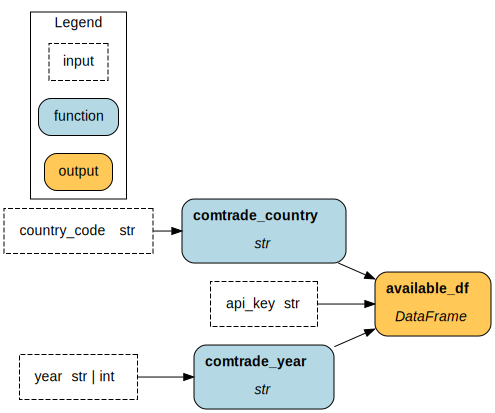

In [6]:
import importlib
from hamilton import driver
from bizwiz.trade.dags import find_available_data
importlib.reload(find_available_data)

api_key = "b1a3f42948df4538a17418bdfdc5574a"

#build graph
dr =  driver.Builder().with_modules(find_available_data).build()

#execute
final_vars = ["available_df",]
inputs = {  
    'country_code' : 'USA',
    'year' : 2023,
    'api_key' : api_key,
}
overrides =  {}

dag_execute = dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(dag_execute)

In [7]:
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(list(results.keys()))
available_df = results['available_df'].copy()

['available_df']